### Sloan Digital Sky Survey Data Release 18

This notebook is dedicated to exploring the SDSS DR18 dataset from https://www.kaggle.com/datasets/diraf0/sloan-digital-sky-survey-dr18.

Note: Full SDSS DR18 can be accessed from https://www.sdss.org/dr18/.
Reading assignment: https://arxiv.org/abs/2301.07688.

Helpful Reference: Machine Learning for Physics and Astronomy | Lecture Notebook with Copyright: Viviana Acquaviva (2023)

In [1]:
import os
import pandas as pd
import numpy as np

from scipy import stats

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import seaborn as sns

In [2]:
# Data Preparation
csv_path = "datasets\SDSS_DR18.csv"

df = pd.read_csv(csv_path)
df.head()

,objid,specobjid,ra,dec,u,g,r,i,z,run,...,psfMag_g,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift,class
0,1.240000e+18,3.240000e+17,184.950869,0.733068,18.87062,17.59612,17.11245,16.83899,16.70908,756,...,19.96352,19.25145,19.05230,0.479021,0.518483,0.520474,0.508502,0.488969,0.041691,GALAXY
1,1.240000e+18,3.250000e+17,185.729201,0.679704,19.59560,19.92153,20.34448,20.66213,20.59599,756,...,19.92417,20.65535,20.57387,0.573926,0.531728,0.403072,0.999874,0.189495,-0.000814,STAR
2,1.240000e+18,3.240000e+17,185.687690,0.823480,19.26421,17.87891,17.09593,16.65159,16.35329,756,...,19.33645,18.16669,17.78844,0.701666,0.743386,0.770897,0.778642,0.736771,0.113069,GALAXY
3,1.240000e+18,2.880000e+18,185.677904,0.768362,19.49739,17.96166,17.41269,17.20545,17.11567,756,...,17.96176,17.21564,17.12367,0.999818,0.787760,0.745611,0.399718,0.986137,0.000087,STAR
4,1.240000e+18,2.880000e+18,185.814763,0.776940,18.31519,16.83033,16.26352,16.06320,15.97527,756,...,16.85104,16.08275,15.98694,0.999795,0.834450,0.723526,0.712259,0.527055,0.000018,STAR


In [3]:
df.columns

Index(['objid', 'specobjid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run',
       'rerun', 'camcol', 'field', 'plate', 'mjd', 'fiberid', 'petroRad_u',
       'petroRad_g', 'petroRad_i', 'petroRad_r', 'petroRad_z', 'petroFlux_u',
       'petroFlux_g', 'petroFlux_i', 'petroFlux_r', 'petroFlux_z',
       'petroR50_u', 'petroR50_g', 'petroR50_i', 'petroR50_r', 'petroR50_z',
       'psfMag_u', 'psfMag_r', 'psfMag_g', 'psfMag_i', 'psfMag_z', 'expAB_u',
       'expAB_g', 'expAB_r', 'expAB_i', 'expAB_z', 'redshift', 'class'],
      dtype='object')

In [4]:
df.describe()

,objid,specobjid,ra,dec,u,g,r,i,z,run,...,psfMag_r,psfMag_g,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift
count,1.000000e+05,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.240000e+18,1.859200e+18,168.856657,17.832739,18.641137,17.407088,16.878550,16.517137,16.154837,1477.564770,...,17.884605,18.392280,17.531364,17.138493,0.588445,0.673314,0.660934,0.549130,0.311389,0.168441
std,3.020047e+06,2.265257e+18,83.844216,26.344079,0.829035,0.974683,1.118858,31.694636,54.871034,459.696408,...,1.288541,1.282606,31.701194,54.876352,0.260097,0.235317,0.242927,31.622620,54.770201,0.434285
min,1.240000e+18,2.990000e+17,0.003092,-11.252825,11.726470,11.696170,11.277090,-9999.000000,-9999.000000,94.000000,...,11.253550,11.658570,-9999.000000,-9999.000000,0.050000,0.050000,0.050000,-9999.000000,-9999.000000,-0.004268
25%,1.240000e+18,5.280000e+17,128.879582,-0.537780,18.214315,16.853340,16.194763,15.861995,15.620268,1239.000000,...,17.098733,17.600867,16.842290,16.645390,0.387406,0.514009,0.487474,0.470529,0.409965,0.000065
50%,1.240000e+18,6.980000e+17,168.079889,2.899490,18.878005,17.520310,16.896065,16.594740,16.419040,1458.000000,...,18.023495,18.585375,17.742665,17.526325,0.611638,0.704848,0.692239,0.679104,0.641443,0.048772
75%,1.240000e+18,2.750000e+18,214.554569,46.911371,19.275750,18.052460,17.565593,17.310102,17.193873,1854.000000,...,18.858960,19.327640,18.586033,18.366243,0.796679,0.864902,0.863116,0.849946,0.822491,0.096680
max,1.240000e+18,1.410000e+19,359.996095,68.731483,19.599990,19.977270,31.698160,30.980870,28.668700,2327.000000,...,24.802850,25.962180,24.362590,27.043280,1.000000,1.000000,1.000000,1.000000,1.000000,6.990327


In [5]:
df.groupby('class').count()

,objid,specobjid,ra,dec,u,g,r,i,z,run,...,psfMag_r,psfMag_g,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift
class,,,,,,,,,,,,,,,,,,,,,
GALAXY,52343,52343,52343,52343,52343,52343,52343,52343,52343,52343,...,52343,52343,52343,52343,52343,52343,52343,52343,52343,52343
QSO,10425,10425,10425,10425,10425,10425,10425,10425,10425,10425,...,10425,10425,10425,10425,10425,10425,10425,10425,10425,10425
STAR,37232,37232,37232,37232,37232,37232,37232,37232,37232,37232,...,37232,37232,37232,37232,37232,37232,37232,37232,37232,37232


In [6]:
bindf = df.drop('class', axis=1)
# bindf.head()

In [7]:
bindf['class_label'] = df['class'].replace({'GALAXY':'0', 'QSO':'1', 'STAR':'2'})
bindf['class_label'] = bindf['class_label'].astype(int)

# bindf.head()

In [8]:
bindf.groupby('class_label').count()

,objid,specobjid,ra,dec,u,g,r,i,z,run,...,psfMag_r,psfMag_g,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift
class_label,,,,,,,,,,,,,,,,,,,,,
0,52343,52343,52343,52343,52343,52343,52343,52343,52343,52343,...,52343,52343,52343,52343,52343,52343,52343,52343,52343,52343
1,10425,10425,10425,10425,10425,10425,10425,10425,10425,10425,...,10425,10425,10425,10425,10425,10425,10425,10425,10425,10425
2,37232,37232,37232,37232,37232,37232,37232,37232,37232,37232,...,37232,37232,37232,37232,37232,37232,37232,37232,37232,37232


In [62]:
bindf['r-i'] = df['r'] - df['i']
bindf['g-r'] = df['g'] - df['r']
bindf['u-g'] = df['u'] - df['g']
bindf['i-z'] = df['i'] - df['z']

final_features = bindf[['r', 'g-r', 'u-g']]
targets = bindf.class_label

# final_features.head()
# targets.head()

In [63]:
final_features.isnull().values.any()

False

In [64]:
final_features.shape, targets.shape

((100000, 3), (100000,))

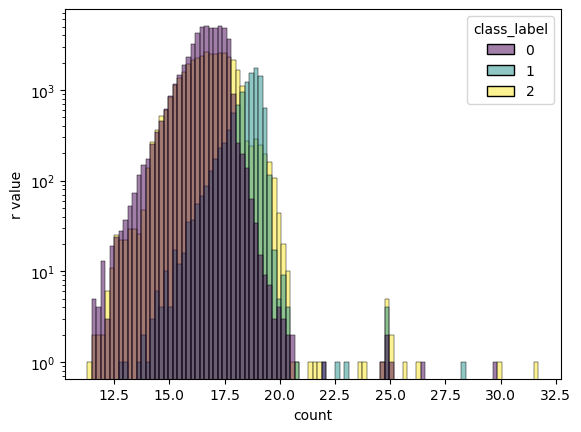

In [65]:
sns.histplot(data=bindf, x='r', hue='class_label', palette='viridis', bins=100)
plt.yscale('log')
plt.ylabel('r value')
plt.xlabel('count')
plt.show()

In [66]:
final_features.describe()

,r,g-r,u-g
count,100000.000000,100000.000000,100000.000000
mean,16.878550,0.528537,1.234049
std,1.118858,0.344070,0.526905
min,11.277090,-14.274310,-2.719890
25%,16.194763,0.334230,0.989905
50%,16.896065,0.541945,1.246715
75%,17.565593,0.762663,1.574403
max,31.698160,4.354610,4.028290


In [67]:
pd.concat([final_features, targets], axis=1).groupby('class_label').describe(percentiles=[])

r                                                     \
               count       mean       std       min       50%       max   
class_label                                                               
0            52343.0  16.634692  0.882597  11.53597  16.73764  29.74405   
1            10425.0  18.493244  0.757592  12.75138  18.67172  28.37412   
2            37232.0  16.769265  1.131770  11.27709  16.82003  31.69816   

                 g-r                                                      u-g  \
               count      mean       std       min      50%      max    count   
class_label                                                                     
0            52343.0  0.693141  0.244324  -9.91260  0.71127  4.33377  52343.0   
1            10425.0  0.186506  0.278455 -11.06188  0.15609  1.66151  10425.0   
2            37232.0  0.392896  0.350842 -14.27431  0.40458  4.35461  37232.0   

                                                             
                 mean       std      min       50%      max  
class_label                                                  
0            1.451951  0.369965 -2.71989  1.397170  4.02829  
1            0.277317  0.287288 -1.24329  0.217050  2.58036  
2            1.195594  0.453448 -2.03059  1.158765  3.98665

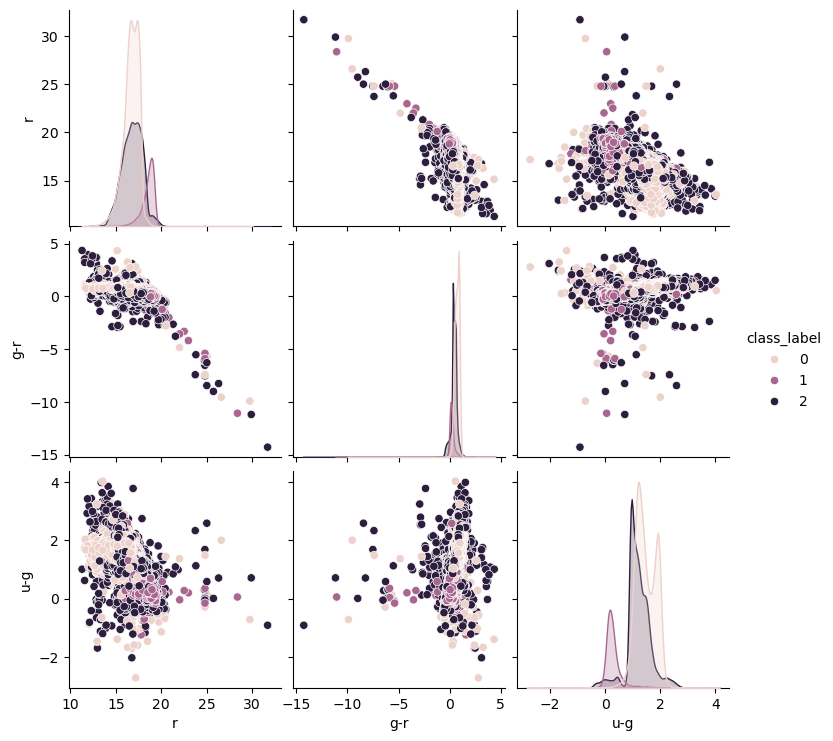

In [68]:
plotdf = bindf[['r', 'g-r', 'u-g', 'class_label']]
plotdf.head()

sns.pairplot(plotdf, hue='class_label', diag_kind='kde')
plt.show()